<a href="https://colab.research.google.com/github/Phuvanenthran-P/Projects/blob/main/Phone_Usage_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phone Usage Analysis Project**

## **Project Overview**

This project analyzes phone usage data in India, with a dataset containing information about user demographics, phone usage patterns, and mobile-related costs. The objective is to clean and visualize the data to identify patterns and insights that can aid in understanding user behavior and trends.

## **Dataset Description**

The dataset phone_usage_india.csv contains the following columns:

* **User ID:** Unique identifier for each user.
* **Age:** Age of the user.
* **Gender:** Gender of the user.
* **Location:** Location of the user.
* **Phone Brand:** Brand of the phone used.
* **OS:** Operating system of the phone.
* **Screen Time (hrs/day):** Daily screen time in hours.
* **Data Usage (GB/month):** Monthly data usage in GB.
* **Calls Duration (mins/day):** Daily call duration in minutes.
* **Number of Apps Installed:** Number of apps installed on the phone.
* **Social Media Time (hrs/day):** Time spent on social media daily in hours.
* **E-commerce Spend (INR/month):** Monthly spending on e-commerce in INR.
* **Streaming Time (hrs/day):** Time spent on streaming services in hours.
* **Gaming Time (hrs/day):** Time spent on gaming in hours.
* **Monthly Recharge Cost (INR):** Monthly recharge cost in INR.
* **Primary Use:** Primary use of the phone.

## **Data Loading and Inspection**

The dataset is loaded into a Pandas DataFrame, and initial inspection is performed to check for missing values, data types, summary statistics, and potential anomalies.

In [2]:
import pandas as pd

# Load the dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('phone_usage_india.csv')  # Replace with the actual file name

# Check the first few rows
df.head()

# Check data types and summary statistics
df.info()
df.describe()

# Check for missing values
null_values = df.isnull().sum()
print("Null Values in Each Column:")
print(null_values)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Total Duplicates: {duplicates}")

# Check for anomalies (negative values)
anomalies_age = df[df['Age'] < 0]
anomalies_screen_time = df[df['Screen Time (hrs/day)'] < 0]
anomalies_data_usage = df[df['Data Usage (GB/month)'] < 0]
anomalies_recharge_cost = df[df['Monthly Recharge Cost (INR)'] < 0]

print("\nAnomalies in 'Age' (negative values):")
print(anomalies_age)

print("\nAnomalies in 'Screen Time (hrs/day)' (negative values):")
print(anomalies_screen_time)

print("\nAnomalies in 'Data Usage (GB/month)' (negative values):")
print(anomalies_data_usage)

print("\nAnomalies in 'Monthly Recharge Cost (INR)' (negative values):")
print(anomalies_recharge_cost)


Saving phone_usage_india.csv to phone_usage_india.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User ID                       17686 non-null  object 
 1   Age                           17686 non-null  int64  
 2   Gender                        17686 non-null  object 
 3   Location                      17686 non-null  object 
 4   Phone Brand                   17686 non-null  object 
 5   OS                            17686 non-null  object 
 6   Screen Time (hrs/day)         17686 non-null  float64
 7   Data Usage (GB/month)         17686 non-null  float64
 8   Calls Duration (mins/day)     17686 non-null  float64
 9   Number of Apps Installed      17686 non-null  int64  
 10  Social Media Time (hrs/day)   17686 non-null  float64
 11  E-commerce Spend (INR/month)  17686 non-null  int64  
 12  Stream

## **Exploratory Data Analysis (EDA)**
### **1. Age Distribution**

A histogram with a KDE curve shows the age distribution of users.

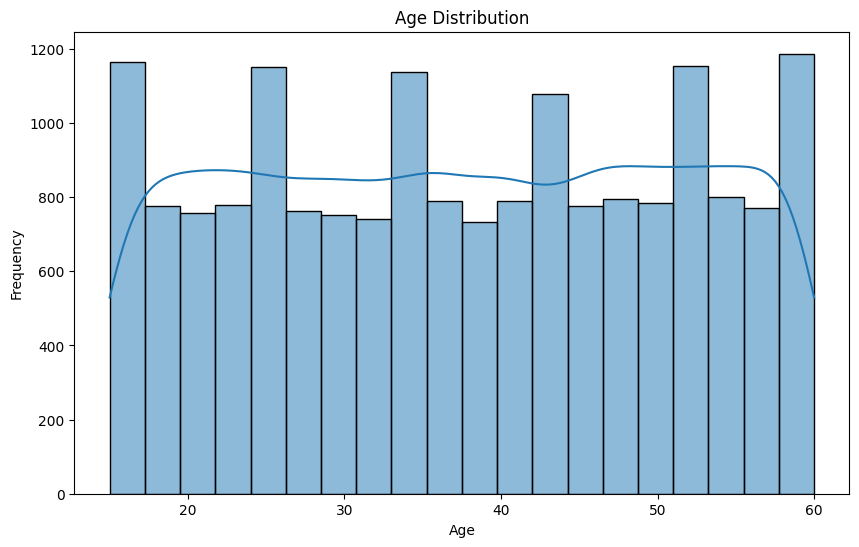

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### **2. Gender Distribution**

A pie chart is used to visualize the gender distribution in the dataset.

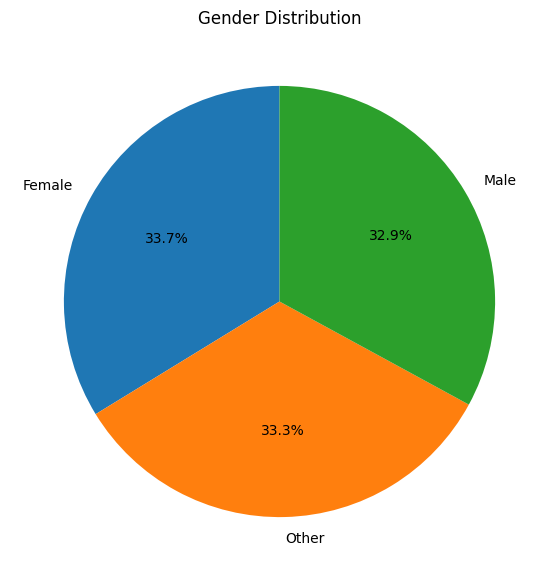

In [4]:
# Gender Distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(7, 7))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


### **3. Screen Time vs Data Usage**

A scatter plot displays the relationship between screen time and data usage, with color coding by gender.

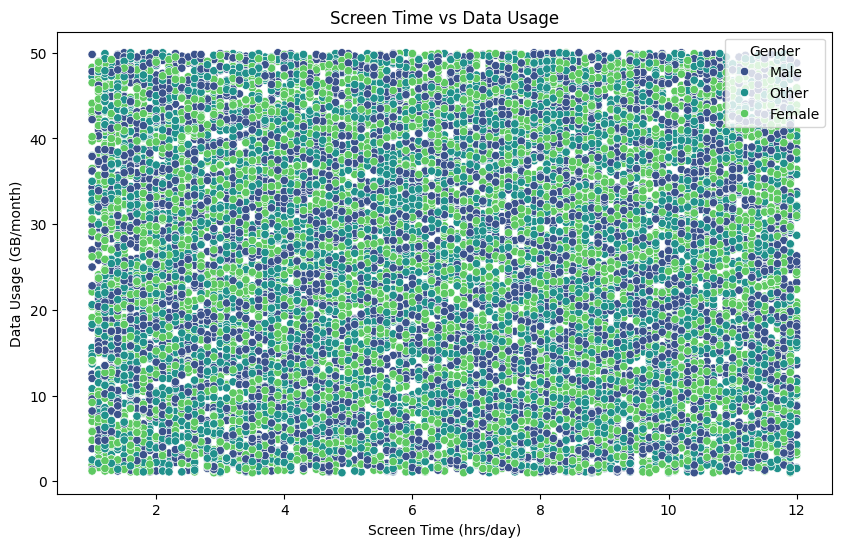

In [5]:
# Screen Time vs Data Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Screen Time (hrs/day)', y='Data Usage (GB/month)', hue='Gender', palette='viridis')
plt.title('Screen Time vs Data Usage')
plt.xlabel('Screen Time (hrs/day)')
plt.ylabel('Data Usage (GB/month)')
plt.show()


### **4. Calls Duration vs Number of Apps Installed**

A scatter plot shows the correlation between call duration and the number of apps installed, with color coding by operating system.

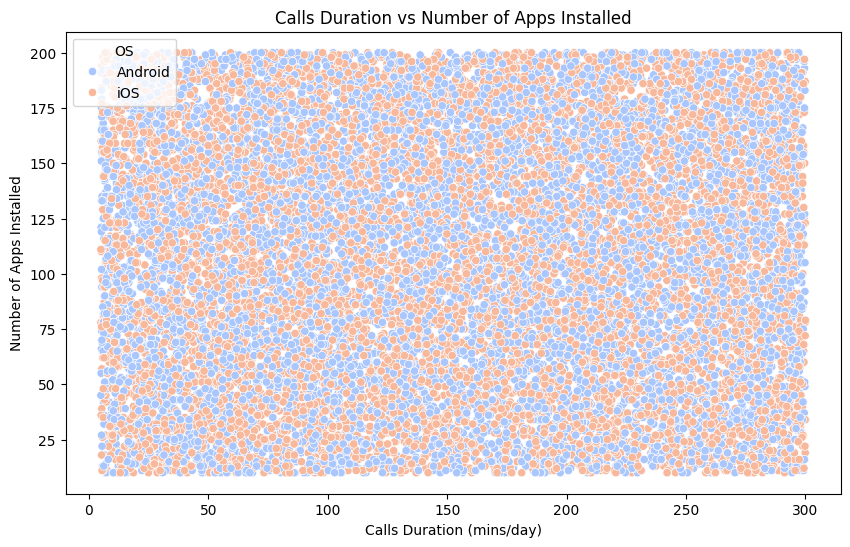

In [6]:
# Calls Duration vs Number of Apps Installed
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Calls Duration (mins/day)', y='Number of Apps Installed', hue='OS', palette='coolwarm')
plt.title('Calls Duration vs Number of Apps Installed')
plt.xlabel('Calls Duration (mins/day)')
plt.ylabel('Number of Apps Installed')
plt.show()


### **5. Monthly Recharge Cost Distribution**

A boxplot illustrates the distribution of monthly recharge costs.

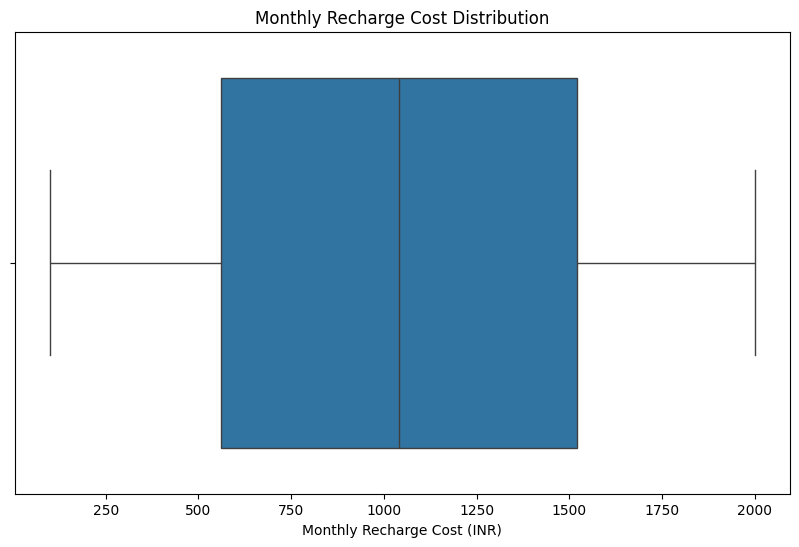

In [7]:
# Monthly Recharge Cost Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Monthly Recharge Cost (INR)')
plt.title('Monthly Recharge Cost Distribution')
plt.xlabel('Monthly Recharge Cost (INR)')
plt.show()


### **6. Correlation Heatmap**

A heatmap of correlations between numerical features reveals relationships between different variables.

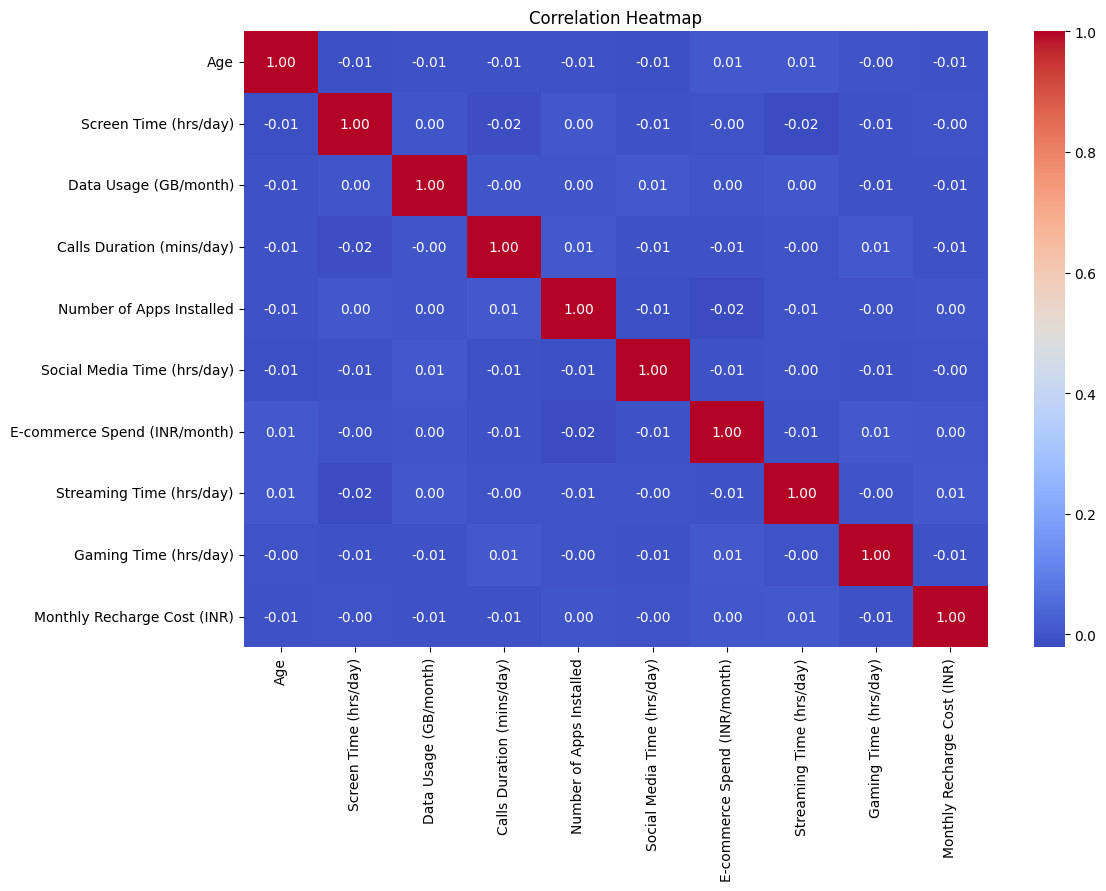

In [8]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
numerical_df = df.select_dtypes(include=['number'])  # Exclude non-numeric columns
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## **Visualization Dashboard**
Using multiple subplots, the key visualizations are presented in a single dashboard.

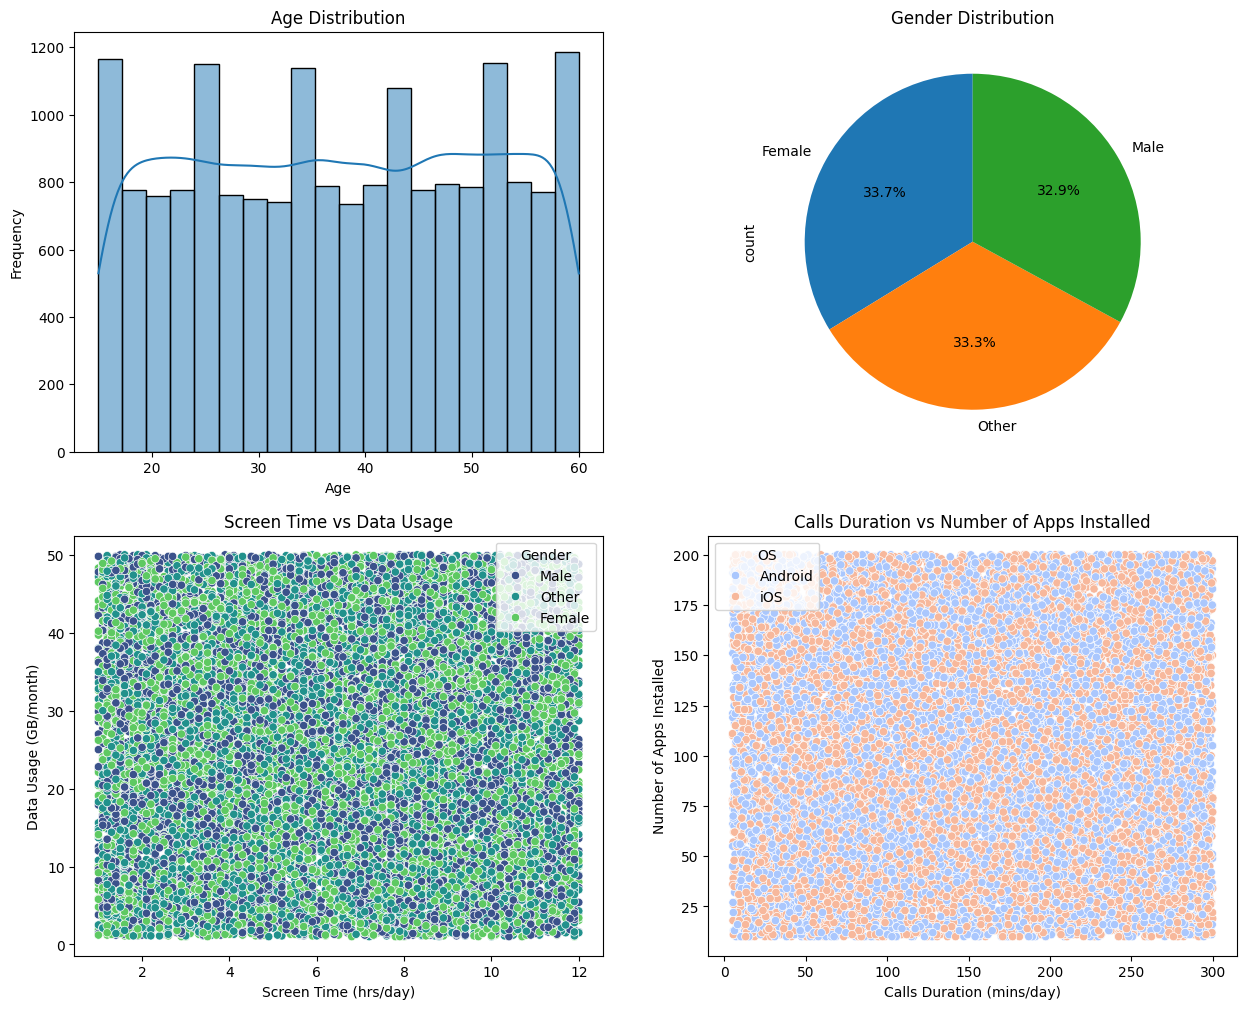

In [10]:
# Create a figure with subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Age Distribution (Histogram)
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# 2. Gender Distribution (Pie Chart)
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[0, 1], legend=False)
axes[0, 1].set_title('Gender Distribution')

# 3. Screen Time vs Data Usage (Scatter Plot)
sns.scatterplot(data=df, x='Screen Time (hrs/day)', y='Data Usage (GB/month)', hue='Gender', palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Screen Time vs Data Usage')
axes[1, 0].set_xlabel('Screen Time (hrs/day)')
axes[1, 0].set_ylabel('Data Usage (GB/month)')

# 4. Calls Duration vs Number of Apps Installed (Scatter Plot)
sns.scatterplot(data=df, x='Calls Duration (mins/day)', y='Number of Apps Installed', hue='OS', palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Calls Duration vs Number of Apps Installed')
axes[1, 1].set_xlabel('Calls Duration (mins/day)')
axes[1, 1].set_ylabel('Number of Apps Installed')

# Adjust layout
# plt.tight_layout()
plt.show()


## **Interactive Plot with Plotly**

For interactive exploration, a Plotly scatter plot of screen time versus data usage is created.



In [11]:
import plotly.express as px

# Example: Interactive scatter plot using Plotly
fig = px.scatter(df, x='Screen Time (hrs/day)', y='Data Usage (GB/month)', color='Gender', title="Screen Time vs Data Usage")
fig.show()


## **Conclusion**

This project provides insights into the phone usage patterns of users in India, including age distribution, screen time, data usage, and recharge costs. By using data cleaning techniques and exploratory visualizations, we can identify key trends that may influence mobile service providers and app developers.

